# Histopatologic Tissues images classification
* This nootebook process the images of Histopatologic images Dataset.
* Include the py files of the project in google drive  and add them as sys.path.append.
* Include the dataset for mass detection to google drive and load it path as the variable path.
* Use the generated CSV of the project that contains the features of the masses.
* The components to process new images are loaded in this notebook

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/HISTO')

In [3]:
!pip install mahotas
!pip install pyradiomics 
!pip install SimpleITK 
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 1.5MB 3.5MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.8-cp36-cp36m-linux_x86_64.whl size=4264004 sha256=2a2d3609bcf4645a60518e09088810f5a0abe42d388e9556833d599d5a06da31
  Stored in directory: /root/.cache/pip/wheels/3e/8b/93/690deca49a46242df274db70dbef26c0a6fa86e378b677e1ab
Successfully built mahotas
     |████████████████████████████████| 163kB 3.5MB/s 
     |████████████████████████████████| 40kB 6.0MB/s 
     |████████████████████████████████| 42.5MB 56kB/s 
     |████████████████████████████████| 4.4MB 31.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: PyWavelets 1.1.1
    Uninstalling PyWavelets-1.1.1:
      Successfully uninstalled PyWavelets-1.1.1
     |████████████████████████████████| 25.0MB 89kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  

## Prepare the datasets 


In [5]:
from feature_extraction.training_data import prepate_datasets
path_train = 'gdrive/My Drive/dataset_hist/train'
prepate_datasets(path_train, "train.csv")

  0%|          | 0/26216 [00:00<?, ?it/s]

Preparing training set!



  1%|          | 288/26216 [01:47<2:14:23,  3.22it/s]

KeyboardInterrupt: ignored

In [11]:
import os
for folder in sorted(os.listdir(path_train)):
  if os.path.isdir(path_train + '/' + folder):
    for file in sorted(os.listdir(path_train + '/' + folder)):
      print(file)

b_trainImage0.png
b_trainImage1000.png
b_trainImage10002.png
b_trainImage10003.png
b_trainImage10006.png
b_trainImage1001.png
b_trainImage10012.png
b_trainImage10016.png
b_trainImage1002.png
b_trainImage10025.png
b_trainImage1003.png
b_trainImage10030.png
b_trainImage10032.png
b_trainImage10037.png
b_trainImage10038.png
b_trainImage10039.png
b_trainImage1004.png
b_trainImage10041.png
b_trainImage10043.png
b_trainImage10046.png
b_trainImage1006.png
b_trainImage10061.png
b_trainImage10063.png
b_trainImage1007.png
b_trainImage10071.png
b_trainImage10072.png
b_trainImage10075.png
b_trainImage10076.png
b_trainImage10077.png
b_trainImage10079.png
b_trainImage1008.png
b_trainImage10080.png
b_trainImage10081.png
b_trainImage10083.png
b_trainImage10084.png
b_trainImage10085.png
b_trainImage10086.png
b_trainImage10087.png
b_trainImage10089.png
b_trainImage1009.png
b_trainImage10092.png
b_trainImage10093.png
b_trainImage10094.png
b_trainImage10097.png
b_trainImage10098.png
b_trainImage1010.png
b_

In [0]:
from feature_extraction.training_data import prepate_datasets
path_val = 'gdrive/My Drive/dataset_hist/val'
prepate_datasets(path_val, "val.csv")

NotADirectoryError: ignored

## Open the datasets

In [0]:
import pandas as pd
train_data = pd.read_csv('gdrive/My Drive/dataset_hist_daisy/train.csv')
val_data = pd.read_csv('gdrive/My Drive/dataset_hist_daisy/val.csv')
X_train = train_data.iloc[:, 3:].to_numpy()
Y_train = (train_data.iloc[:, 2] == 'm0').to_numpy() * 1
X_val = val_data.iloc[:, 3:].to_numpy()
Y_val = (val_data.iloc[:, 2] == 'm0').to_numpy() * 1

## XG Boost CLASSIFIER

In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score

*   Set the parameters of the XGBoost classifier
*   Calculate the ratio between both classes and assign it to a parameter.





In [0]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
params = {
    'objective':'binary:logistic',
    'max_depth':10,
    'silent':1,
    'eta':1
}
num_rounds = 50
train_labels = dtrain.get_label()
ratio = 0.5
#float(np.sum(train_labels == 0)) / np.sum(train_labels == 1)
params['scale_pos_weight'] = ratio
bst_model = params, num_rounds
print(ratio)

0.5


#### Model Training 

In [0]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_val)

params, num_rounds = bst_model

bst = xgb.train(params, dtrain, num_rounds)
probability = bst.predict(dtest)

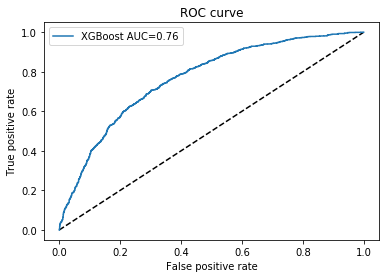

In [0]:
from sklearn.metrics import roc_curve, auc,accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_val, probability)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='XGBoost AUC='+'{0:.2f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [0]:
print(accuracy_score(Y_val, probability>0.5))
confusion_matrix(Y_val, probability>0.5)

0.6952410006101282


array([[1250,  389],
       [ 610, 1029]])

## LOGISTIC REGRESSION

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logisticRegr = LogisticRegression(solver='lbfgs')
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted = logisticRegr.predict(X_val)
print(accuracy_score(Y_val, predicted))
confusion_matrix(Y_val, predicted)

0.6351433801098231


array([[ 815,  824],
       [ 372, 1267]])

## BAG OF WORDS

In [0]:

!ldconfig -v

/sbin/ldconfig.real: Can't stat /usr/local/nvidia/lib: No such file or directory
/sbin/ldconfig.real: Can't stat /usr/local/nvidia/lib64: No such file or directory
/sbin/ldconfig.real: Can't stat /usr/local/lib/x86_64-linux-gnu: No such file or directory
/sbin/ldconfig.real: Path `/lib/x86_64-linux-gnu' given more than once
/sbin/ldconfig.real: Path `/usr/lib/x86_64-linux-gnu' given more than once
/usr/local/cuda-10.0/targets/x86_64-linux/lib:
	libcusolver.so.10.0 -> libcusolver.so.10.0.130
	libnppisu.so.10.0 -> libnppisu.so.10.0.130
	libnppial.so.10.0 -> libnppial.so.10.0.130
	libnppist.so.10.0 -> libnppist.so.10.0.130
	libcurand.so.10.0 -> libcurand.so.10.0.130
	libnppicom.so.10.0 -> libnppicom.so.10.0.130
	libcufftw.so.10.0 -> libcufftw.so.10.0.145
	libcufft.so.10.0 -> libcufft.so.10.0.145
	libnpps.so.10.0 -> libnpps.so.10.0.130
	libnppim.so.10.0 -> libnppim.so.10.0.130
	libnppig.so.10.0 -> libnppig.so.10.0.130
	libnvrtc-builtins.so.10.0 -> libnvrtc-builtins.so.10.0.130
	libnvrtc.so

In [0]:
!cp /usr/local/lib/python3.6/dist-packages/libcuml.so /usr/lib64-nvidia/

In [0]:
import cudf
from cuml.cluster import DBSCAN
import cuml

OSError: ignored

In [0]:
!pip install libKMCUDA 

  Using cached https://files.pythonhosted.org/packages/2e/2f/07c103a2770b2261a70b6b0a1fb644a7bf561789c162763eee9cfd45d9b1/libKMCUDA-6.2.3.tar.gz
  ERROR: Failed building wheel for libKMCUDA
  Running setup.py clean for libKMCUDA
Failed to build libKMCUDA
    Running setup.py install for libKMCUDA ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_muelz13/libKMCUDA/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_muelz13/libKMCUDA/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-umeihf2e/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [0]:
import numpy as np
from libKMCUDA import kmeans_cuda

ModuleNotFoundError: ignored

In [0]:
def create_vocabulary(all_features, words):
  transformation = KMeans(n_clusters=words, random_state=0)
  transformation.fit(all_features)
  return transformation

In [0]:
def create_histogram(features_per_img, transformation):
  N_images = features_per_img.shape[0]
  words = transformation.n_clusters
  histogram_words = np.zeros((N_images, words))
  for i in range(N_images):
    ft_img = features_per_img[i,:,:]
    code = transformation.predict(ft_img)
    hist_code,_ = np.histogram(code, bins=words)
    histogram_words[i,:] = hist_code
  return histogram_words

In [0]:
all_features = X_train.reshape((-1,104))
all_features = all_features[:10000,:]
transformation = create_vocabulary(all_features, 100)
features_per_img = X_train.reshape((-1,64,104))
histogram = create_histogram(features_per_img, transformation)




In [0]:
histogram

array([[21.,  0.,  0., ...,  0.,  0.,  3.],
       [43.,  0.,  0., ...,  0.,  0.,  6.],
       [ 3.,  2.,  0., ...,  0.,  0., 36.],
       ...,
       [11.,  0.,  0., ...,  0.,  0., 21.],
       [ 5.,  0.,  0., ...,  0.,  0., 39.],
       [47.,  0.,  0., ...,  0.,  0.,  2.]])

In [0]:
features = X_train.reshape((-1,104))
features = features[:10000,:]
features.shape

(10000, 104)

In [0]:
kmeans = KMeans(n_clusters=50, random_state=0)
output = kmeans.fit_predict(features)

In [0]:
kmeans.cluster_centers_.shape

(50, 104)

(1677824, 104)

In [0]:
features[0,:]

array([0.01267036, 0.01609516, 0.01202442, 0.00851449, 0.01078571,
       0.01253412, 0.00964865, 0.00881834, 0.0121895 , 0.01695733,
       0.01358553, 0.01049632, 0.01360029, 0.01692989, 0.01256743,
       0.00834194, 0.01054305, 0.01583399, 0.01308443, 0.00767877,
       0.00936655, 0.01402641, 0.01146612, 0.00803413, 0.0123127 ,
       0.01740231, 0.01339956, 0.00816196, 0.01264304, 0.01789486,
       0.01304943, 0.00945651, 0.01018392, 0.01589299, 0.01351061,
       0.00782232, 0.00836522, 0.0098588 , 0.00747177, 0.00622506,
       0.00524388, 0.00843565, 0.00642351, 0.00333729, 0.00381217,
       0.0047283 , 0.00367713, 0.00297739, 0.00765045, 0.01301358,
       0.01113907, 0.00725849, 0.00769857, 0.00781365, 0.00569027,
       0.00441863, 0.01128396, 0.01660709, 0.01371989, 0.00912331,
       0.01076492, 0.01417944, 0.01136537, 0.008102  , 0.0119046 ,
       0.01641389, 0.0131384 , 0.00922082, 0.01203968, 0.01582837,
       0.01295639, 0.0093313 , 0.01263801, 0.01807274, 0.01486

In [0]:
features_per_img = X_train.reshape((-1,64,104))
ft_img = features_per_img[0,:,:]

In [0]:
ft_img.shape

(64, 104)

In [0]:
code = kmeans.predict(ft_img)

In [0]:
hist_code,val = np.histogram(code, bins=np.arange(kmeans.n_clusters+1))

In [0]:
hist_code.shape

(49,)

In [0]:
hist_code.shape

(50,)

In [0]:
histogram_words = np.zeros((len(X_train), kmeans.n_clusters))

In [0]:
histogram_words[0,:] = hist_code

In [0]:
histogram_words

array([[21.,  0.,  0., ...,  0.,  3.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])